# Airport Delays

Using the dataset named "M1_final," determine if there is a way to predict delays in departure times for this airport. 

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!unzip /content/data.zip -d /content

In [4]:
!pip install category_encoders

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [6]:
airports = pd.read_csv('/content/data/M1_final.csv')

In [21]:
airports.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'DEST', 'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M',
       'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity',
       'Wind', 'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr', 'TAXI_OUT'],
      dtype='object')

In [22]:
X = airports.drop(columns=['DEP_DELAY', 'TAIL_NUM'])
y = airports['DEP_DELAY']

In [23]:
X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.25, random_state=42)

In [24]:
model = make_pipeline(
     OneHotEncoder(),
     RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=65, max_samples=0.90, max_depth=30)
 )

In [25]:
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['OP_UNIQUE_CARRIER', 'DEST', 'Dew Point',
                                     'Wind', 'Condition'])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, max_samples=0.9,
                                       n_estimators=65, n_jobs=-1,
                                       random_state=42))])

In [26]:
model.score(X_val, y_val)

0.7417975516404032

In [27]:
mean_absolute_error(y_val, model.predict(X_val))

3.911509798214753

In [28]:
perm_imp = permutation_importance(model, X_val, y_val, n_jobs=-1, random_state=42)

In [29]:
imp_df = pd.DataFrame(index=X.columns, data={'mean': perm_imp['importances_mean'], 'std': perm_imp['importances_std']}).sort_values(by='mean')

In [30]:
imp_df

,mean,std
DAY_OF_MONTH,-0.001133,0.000243
TAXI_OUT,-0.001068,0.000904
Temperature,-0.000657,0.001148
DAY_OF_WEEK,0.000064,0.000166
Humidity,0.000191,0.000137
DISTANCE,0.000355,0.000330
Wind,0.000479,0.000507
Wind Gust,0.000546,0.001278
MONTH,0.000551,0.000629
OP_UNIQUE_CARRIER,0.000676,0.000470


In [31]:
X = airports.drop(columns=['DEP_DELAY', 'TAIL_NUM', 'Temperature', 'DAY_OF_MONTH', 'TAXI_OUT'])
y = airports['DEP_DELAY']

In [32]:
X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.25, random_state=42)

In [33]:
model_rf = make_pipeline(
     OneHotEncoder(),
     RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=65, max_samples=0.90, max_depth=30)
 )

In [34]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['OP_UNIQUE_CARRIER', 'DEST', 'Dew Point',
                                     'Wind', 'Condition'])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, max_samples=0.9,
                                       n_estimators=65, n_jobs=-1,
                                       random_state=42))])

In [38]:
model_rf.score(X_test, y_test)

0.8553509917021243

In [39]:
mean_absolute_error(y_test, model_rf.predict(X_test))

3.1868522206223258

In [40]:
preds = pd.DataFrame(data={'actual': y_test, 'predicted': model_rf.predict(X_test)})

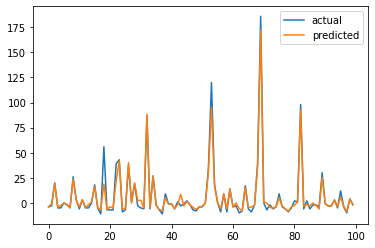

In [41]:
preds.sample(100).reset_index(drop=True).plot()